Mean Squared Error: 0.3538532212949927


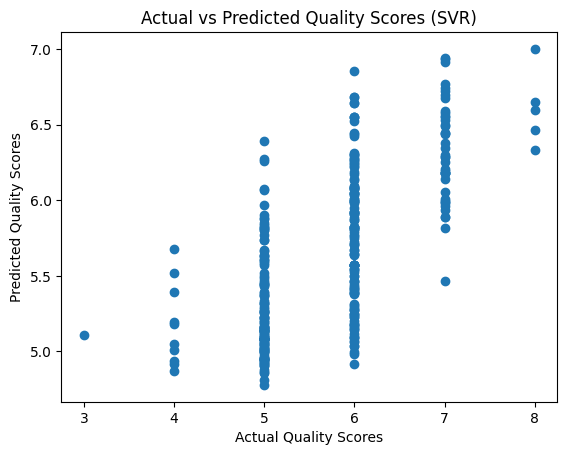

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Step 1: Load the winequality-red dataset
data = pd.read_csv('/content/winequality-red.csv')  # Replace with the correct path if needed

# Step 2: Define features (X) and target (y)
# Here, we use all columns except 'quality' as features
X = data.drop(columns='quality')
y = data['quality']  # The target is the 'quality' column

# Step 3: Handle missing values, if any (mean imputation)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply imputation only on features

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Step 6: Fit SVR Model
regressor = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
regressor.fit(X_train_scaled, y_train_scaled)

# Step 7: Predict on test set
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 9: Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality Scores")
plt.ylabel("Predicted Quality Scores")
plt.title("Actual vs Predicted Quality Scores (SVR)")
plt.show()
